<a href="https://colab.research.google.com/github/LEESUAJE1978/data-analysis/blob/master/11%EA%B0%95_%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 구글드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. 경로지정


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
%ls

 01.linear_regression.ipynb              'ex03_Linear Regression.ipynb'
'10강 실습코드.ipynb'                    'ex04_logistic Regression.ipynb'
'6강_다변량 로지스틱 회귀분석.ipynb'     'ex04_Logistic Regression.ipynb'
 7강실습코드.ipynb                       'ex05_mutinomial logistic.ipynb'
'8강 실습코드.ipynb'                     'ex06_CNN (1).ipynb'
'9강 실습코드.ipynb'                      ex06_CNN.ipynb
 Accidents0515.csv                       'ex07_RNN (1).ipynb'
'campus recruit.csv'                      ex07_RNN.ipynb
 Casualties0515.csv                       logistic_express.ipynb
 class01.ipynb                           'logistic regression.ipynb'
 class02.ipynb                            lstm.ipynb
 class03.ipynb                            pandas-profiling-master.zip
 class04.ipynb                            statistics.ipynb
 class05.ipynb                            SWEETVIZ_REPORT.gdoc
'Copy of ex01_hello'                      SWEETVIZ_REPORT.html
 covid19

2. 패키지 불러오기

In [3]:
import pandas as pd
from sklearn import datasets  #iris 데이터
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

3. iris 데이터 셋 불러오기 및 확인

In [8]:
if __name__ == '__main__':
  iris = datasets.load_iris()
  print('아이리스 종류:', iris.target_names)
  print('target: [0:setosa, 1:versicolor, 2:virginica]')
  print('데이터 수:', len(iris.data))
  print('데이터 열 이름:', iris.feature_names)

아이리스 종류: ['setosa' 'versicolor' 'virginica']
target: [0:setosa, 1:versicolor, 2:virginica]
데이터 수: 150
데이터 열 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

4. 데이터 프레임으로 변환

In [15]:
data = pd.DataFrame(
    {
        "sepal length": iris.data[:,0],
        "sepal width": iris.data[:,1],
        "petal length": iris.data[:,2],
        "petal width": iris.data[:,3],
        "species":iris.target
     }
)
print(data.head())

   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


5. 학습 & 예측 데이터 나누기

In [18]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width' ]]
y = data['species']

In [56]:
import numpy as np
X = np.array(x)
Y= np.array(y)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [29]:
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

105 45
105 45


In [39]:
forest = RandomForestClassifier(n_estimators=5, random_state=2) #n_estimators: number of tree in the forest,default 100, gini impurity, information gain 참고: https://tensorflow.blog/tag/gini-impurity/, max_depth: maxium depth of tree, default none, min_samples_split:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred = forest.predict(x_test)
print(list(y_test))
print(list(y_pred))

[1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0]
[1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0]


6. 정확도 확인

In [41]:
print('정확도:', metrics.accuracy_score(y_test, y_pred))

정확도: 0.9777777777777777


7. 변수 중요도 시각화

In [42]:
print(forest.feature_importances_)

[0.07105285 0.02135286 0.43972859 0.4678657 ]


#mglearn 패키지 설치

In [46]:
!pip install mglearn

     |████████████████████████████████| 542kB 7.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=bfe0d671856c90a9b41dbdfdd15b1abe5cfddbb8f3694c74ebdfd1091970318e
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [47]:
import matplotlib.pyplot as plt
import mglearn

8. 시각화 함수 정의

In [76]:
def plot_feature_importance(model):
  n_features = iris.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), iris.feature_names)
  plt.xlabel("attr importances")
  plt.ylabel("attr")
  plt.ylim(-1, n_features)
plt.show()

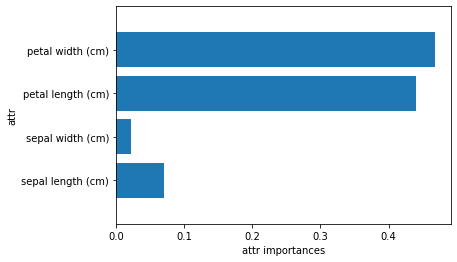

In [77]:
plot_feature_importance(forest)